In [1]:
import matplotlib.pyplot as plt
import numpy as np
from alpaca import ALPcouplings, citations, branching_ratio, decay_width
from alpaca.decays.alp_decays import hadronic_decays_def, gaugebosons
from alpaca.decays.alp_decays.branching_ratios import BRsalp
plt.rcParams.update({'text.usetex':True})

## Hadronic decays: Aloni *et al.* and beyond

We reproduce Figure (S1) of 
> D. Aloni, Y. Soreq, M. Williams "Coupling QCD-Scale Axionlike Particles to Gluons" Phys.Rev.Lett. 123 (2019) 3, 031803. [arXiv:1811.03474 [hep-ph]](https://arxiv.org/abs/1811.03474)

which only includes ALP couplings to gluons.

In [ ]:
fa = 1000/32/np.pi**2

# Vectorizing the functions for ease of use
atogamma = np.vectorize(gaugebosons.decfay_width_2gamma)
ato3pi = np.vectorize(lambda ma, couplings, fa, **kwargs: hadronic_decays_def.decay_width_3pi000(ma, couplings, fa, **kwargs) + hadronic_decays_def.decay_width_3pi0pm(ma, couplings, fa, **kwargs))
atogammapipi = np.vectorize(hadronic_decays_def.decay_width_gammapipi)
atoetapi = np.vectorize(lambda ma, couplings, fa, **kwargs: hadronic_decays_def.decay_width_etapipi00(ma, couplings, fa, **kwargs) + hadronic_decays_def.decay_width_etapipipm(ma, couplings, fa, **kwargs))
atoetappi = np.vectorize(lambda ma, couplings, fa, **kwargs: hadronic_decays_def.decay_width_etappipi00(ma, couplings, fa, **kwargs) + hadronic_decays_def.decay_width_etappipipm(ma, couplings, fa, **kwargs))
ato2w = np.vectorize(hadronic_decays_def.decay_width_2w)
atog = np.vectorize(gaugebosons.decay_width_2gluons)

Text(0.5, 1.0, '$c_g=1\\,,\\qquad \\Lambda=32\\pi^2 f_a = 1\\,\\mathrm{TeV}$')

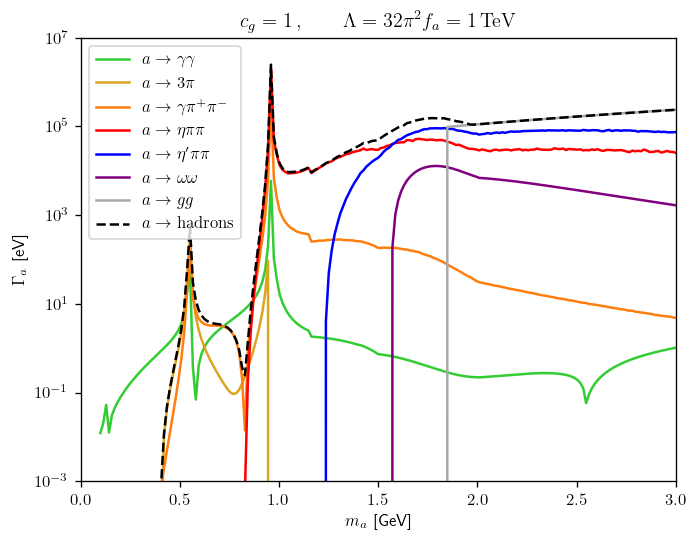

In [ ]:
plt.figure(dpi=120)
coupl_cG = ALPcouplings({'cG': 1.0}, 3.0, 'VA_below')
ma_range = np.linspace(0.1, 3, 200)
fa = 1000/32/np.pi**2

# RGE evolution is negligible
plt.semilogy(ma_range, 1e9*decay_width('a -> gamma gamma', ma_range, coupl_cG, fa, integrator='no_rge'), c='limegreen', label=r'$a\to\gamma\gamma$')
plt.semilogy(ma_range, 1e9*decay_width('a -> pi pi pi', ma_range, coupl_cG, fa, integrator='no_rge'), c='goldenrod', label=r'$a\to3\pi$')
plt.semilogy(ma_range, 1e9*decay_width('a -> gamma pi pi', ma_range, coupl_cG, fa, integrator='no_rge'), c='tab:orange', label=r'$a\to\gamma\pi^+\pi^-$')
plt.semilogy(ma_range, 1e9*decay_width('a -> eta pi pi', ma_range, coupl_cG, fa, integrator='no_rge'), c='red', label=r'$a\to\eta\pi\pi$')
plt.semilogy(ma_range, 1e9*decay_width('a -> eta_prime pi pi', ma_range, coupl_cG, fa, integrator='no_rge'), c='blue', label=r"$a\to\eta'\pi\pi$")
plt.semilogy(ma_range, 1e9*decay_width('a -> omega omega', ma_range, coupl_cG, fa), c='purple', label=r'$a\to\omega\omega$')
plt.semilogy(ma_range, 1e9*decay_width('a -> g g', ma_range, coupl_cG, fa, integrator='no_rge'), c='darkgrey', label=r'$a\to gg$')
plt.semilogy(ma_range, 1e9*decay_width('a -> hadrons', ma_range, coupl_cG, fa, integrator='no_rge'), c='black', ls='dashed', label=r'$a\to \mathrm{hadrons}$')
plt.ylim(1e-3, 1e7)
plt.xlim(0, 3)
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$\Gamma_a$ [eV]')
plt.legend()
plt.title(r'$c_g=1\,,\qquad \Lambda=32\pi^2 f_a = 1\,\mathrm{TeV}$')

And we extend their results to couplings to up, down, strange quarks and to photons

Text(0.5, 1.0, '$c_u=1\\,,\\qquad \\Lambda=32\\pi^2 f_a = 1\\,\\mathrm{TeV}$')

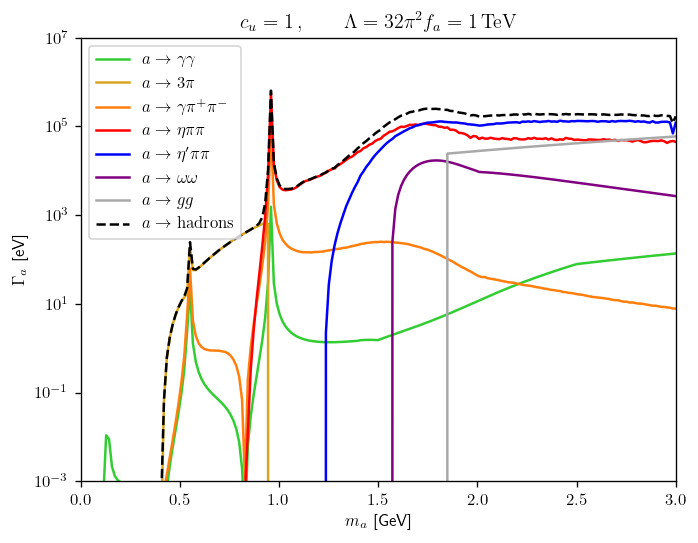

In [4]:
plt.figure(dpi=120)
coupl_cu = ALPcouplings({'cuA': np.diag([1,0])}, 3.0, 'VA_below')
ma_range = np.linspace(0.1, 3, 200)

plt.semilogy(ma_range, 1e9*decay_width('a -> gamma gamma', ma_range, coupl_cu, fa, integrator='no_rge'), c='limegreen', label=r'$a\to\gamma\gamma$')
plt.semilogy(ma_range, 1e9*decay_width('a -> pi pi pi', ma_range, coupl_cu, fa, integrator='no_rge'), c='goldenrod', label=r'$a\to3\pi$')
plt.semilogy(ma_range, 1e9*decay_width('a -> gamma pi pi', ma_range, coupl_cu, fa, integrator='no_rge'), c='tab:orange', label=r'$a\to\gamma\pi^+\pi^-$')
plt.semilogy(ma_range, 1e9*decay_width('a -> eta pi pi', ma_range, coupl_cu, fa, integrator='no_rge'), c='red', label=r'$a\to\eta\pi\pi$')
plt.semilogy(ma_range, 1e9*decay_width('a -> eta_prime pi pi', ma_range, coupl_cu, fa, integrator='no_rge'), c='blue', label=r"$a\to\eta'\pi\pi$")
plt.semilogy(ma_range, 1e9*decay_width('a -> omega omega', ma_range, coupl_cu, fa), c='purple', label=r'$a\to\omega\omega$')
plt.semilogy(ma_range, 1e9*decay_width('a -> g g', ma_range, coupl_cu, fa, integrator='no_rge'), c='darkgrey', label=r'$a\to gg$')
plt.semilogy(ma_range, 1e9*decay_width('a -> hadrons', ma_range, coupl_cu, fa, integrator='no_rge'), c='black', ls='dashed', label=r'$a\to \mathrm{hadrons}$')
plt.ylim(1e-3, 1e7)
plt.xlim(0, 3)
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$\Gamma_a$ [eV]')
plt.legend()
plt.title(r'$c_u=1\,,\qquad \Lambda=32\pi^2 f_a = 1\,\mathrm{TeV}$')

Text(0.5, 1.0, '$c_d=1\\,,\\qquad \\Lambda=32\\pi^2 f_a = 1\\,\\mathrm{TeV}$')

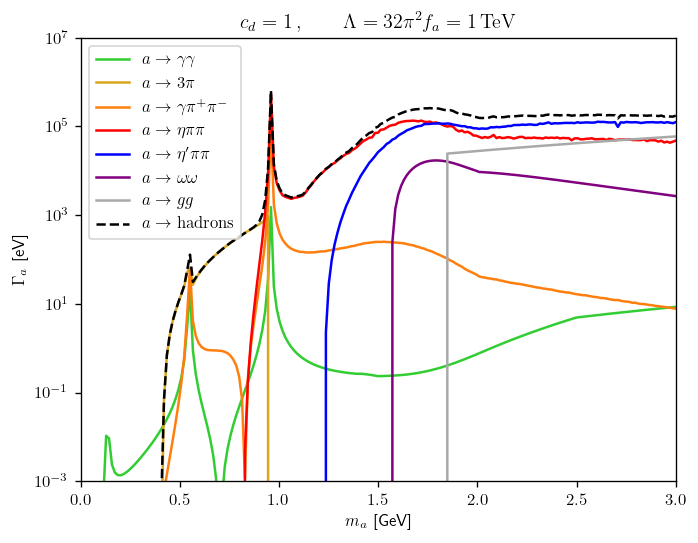

In [5]:
plt.figure(dpi=120)
coupl_cd = ALPcouplings({'cdA': np.diag([1, 0, 0])}, 3.0, 'VA_below')
ma_range = np.linspace(0.1, 3, 200)

plt.semilogy(ma_range, 1e9*decay_width('a -> gamma gamma', ma_range, coupl_cd, fa, integrator='no_rge'), c='limegreen', label=r'$a\to\gamma\gamma$')
plt.semilogy(ma_range, 1e9*decay_width('a -> pi pi pi', ma_range, coupl_cd, fa, integrator='no_rge'), c='goldenrod', label=r'$a\to3\pi$')
plt.semilogy(ma_range, 1e9*decay_width('a -> gamma pi pi', ma_range, coupl_cd, fa, integrator='no_rge'), c='tab:orange', label=r'$a\to\gamma\pi^+\pi^-$')
plt.semilogy(ma_range, 1e9*decay_width('a -> eta pi pi', ma_range, coupl_cd, fa, integrator='no_rge'), c='red', label=r'$a\to\eta\pi\pi$')
plt.semilogy(ma_range, 1e9*decay_width('a -> eta_prime pi pi', ma_range, coupl_cd, fa, integrator='no_rge'), c='blue', label=r"$a\to\eta'\pi\pi$")
plt.semilogy(ma_range, 1e9*decay_width('a -> omega omega', ma_range, coupl_cd, fa), c='purple', label=r'$a\to\omega\omega$')
plt.semilogy(ma_range, 1e9*decay_width('a -> g g', ma_range, coupl_cd, fa, integrator='no_rge'), c='darkgrey', label=r'$a\to gg$')
plt.semilogy(ma_range, 1e9*decay_width('a -> hadrons', ma_range, coupl_cd, fa, integrator='no_rge'), c='black', ls='dashed', label=r'$a\to \mathrm{hadrons}$')
plt.ylim(1e-3, 1e7)
plt.xlim(0, 3)
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$\Gamma_a$ [eV]')
plt.legend()
plt.title(r'$c_d=1\,,\qquad \Lambda=32\pi^2 f_a = 1\,\mathrm{TeV}$')

Text(0.5, 1.0, '$c_s=1\\,,\\qquad \\Lambda=32\\pi^2 f_a = 1\\,\\mathrm{TeV}$')

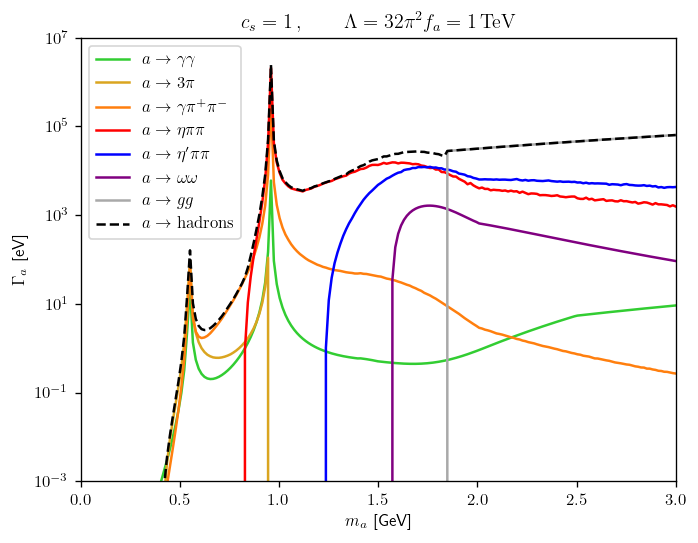

In [6]:
plt.figure(dpi=120)
coupl_cs = ALPcouplings({'cdA': np.diag([0, 1, 0])}, 3.0, 'VA_below')
ma_range = np.linspace(0.1, 3, 200)

plt.semilogy(ma_range, 1e9*decay_width('a -> gamma gamma', ma_range, coupl_cs, fa, integrator='no_rge'), c='limegreen', label=r'$a\to\gamma\gamma$')
plt.semilogy(ma_range, 1e9*decay_width('a -> pi pi pi', ma_range, coupl_cs, fa, integrator='no_rge'), c='goldenrod', label=r'$a\to3\pi$')
plt.semilogy(ma_range, 1e9*decay_width('a -> gamma pi pi', ma_range, coupl_cs, fa, integrator='no_rge'), c='tab:orange', label=r'$a\to\gamma\pi^+\pi^-$')
plt.semilogy(ma_range, 1e9*decay_width('a -> eta pi pi', ma_range, coupl_cs, fa, integrator='no_rge'), c='red', label=r'$a\to\eta\pi\pi$')
plt.semilogy(ma_range, 1e9*decay_width('a -> eta_prime pi pi', ma_range, coupl_cs, fa, integrator='no_rge'), c='blue', label=r"$a\to\eta'\pi\pi$")
plt.semilogy(ma_range, 1e9*decay_width('a -> omega omega', ma_range, coupl_cs, fa), c='purple', label=r'$a\to\omega\omega$')
plt.semilogy(ma_range, 1e9*decay_width('a -> g g', ma_range, coupl_cs, fa, integrator='no_rge'), c='darkgrey', label=r'$a\to gg$')
plt.semilogy(ma_range, 1e9*decay_width('a -> hadrons', ma_range, coupl_cs, fa, integrator='no_rge'), c='black', ls='dashed', label=r'$a\to \mathrm{hadrons}$')
plt.ylim(1e-3, 1e7)
plt.xlim(0, 3)
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$\Gamma_a$ [eV]')
plt.legend()
plt.title(r'$c_s=1\,,\qquad \Lambda=32\pi^2 f_a = 1\,\mathrm{TeV}$')

Text(0.5, 1.0, '$c_\\gamma=1\\,,\\qquad \\Lambda=32\\pi^2 f_a = 1\\,\\mathrm{TeV}$')

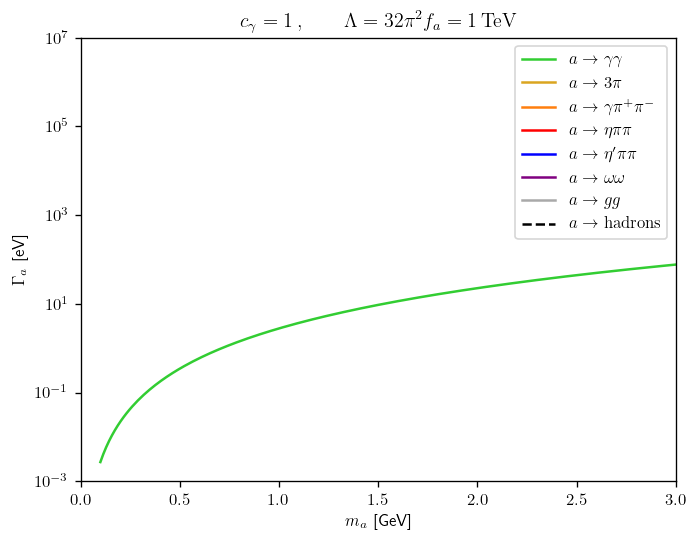

In [7]:
plt.figure(dpi=120)
coupl_cgamma = ALPcouplings({'cgamma': 1.0}, 3.0, 'VA_below')
ma_range = np.linspace(0.1, 3, 200)

plt.semilogy(ma_range, 1e9*decay_width('a -> gamma gamma', ma_range, coupl_cgamma, fa, integrator='no_rge'), c='limegreen', label=r'$a\to\gamma\gamma$')
plt.semilogy(ma_range, 1e9*decay_width('a -> pi pi pi', ma_range, coupl_cgamma, fa, integrator='no_rge'), c='goldenrod', label=r'$a\to3\pi$')
plt.semilogy(ma_range, 1e9*decay_width('a -> gamma pi pi', ma_range, coupl_cgamma, fa, integrator='no_rge'), c='tab:orange', label=r'$a\to\gamma\pi^+\pi^-$')
plt.semilogy(ma_range, 1e9*decay_width('a -> eta pi pi', ma_range, coupl_cgamma, fa, integrator='no_rge'), c='red', label=r'$a\to\eta\pi\pi$')
plt.semilogy(ma_range, 1e9*decay_width('a -> eta_prime pi pi', ma_range, coupl_cgamma, fa, integrator='no_rge'), c='blue', label=r"$a\to\eta'\pi\pi$")
plt.semilogy(ma_range, 1e9*decay_width('a -> omega omega', ma_range, coupl_cgamma, fa), c='purple', label=r'$a\to\omega\omega$')
plt.semilogy(ma_range, 1e9*decay_width('a -> g g', ma_range, coupl_cgamma, fa, integrator='no_rge'), c='darkgrey', label=r'$a\to gg$')
plt.semilogy(ma_range, 1e9*decay_width('a -> hadrons', ma_range, coupl_cgamma, fa, integrator='no_rge'), c='black', ls='dashed', label=r'$a\to \mathrm{hadrons}$')
plt.ylim(1e-3, 1e7)
plt.xlim(0, 3)
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$\Gamma_a$ [eV]')
plt.legend()
plt.title(r'$c_\gamma=1\,,\qquad \Lambda=32\pi^2 f_a = 1\,\mathrm{TeV}$')

## All decay modes

In [7]:
couplings = ALPcouplings({'cgamma': 1.0, 'cuA': 1.0, 'cdA': 1.0, 'ceA': 1.0}, scale=10, basis='VA_below')

In [8]:
ma = np.logspace(-1,1,1000)
fa = 1000

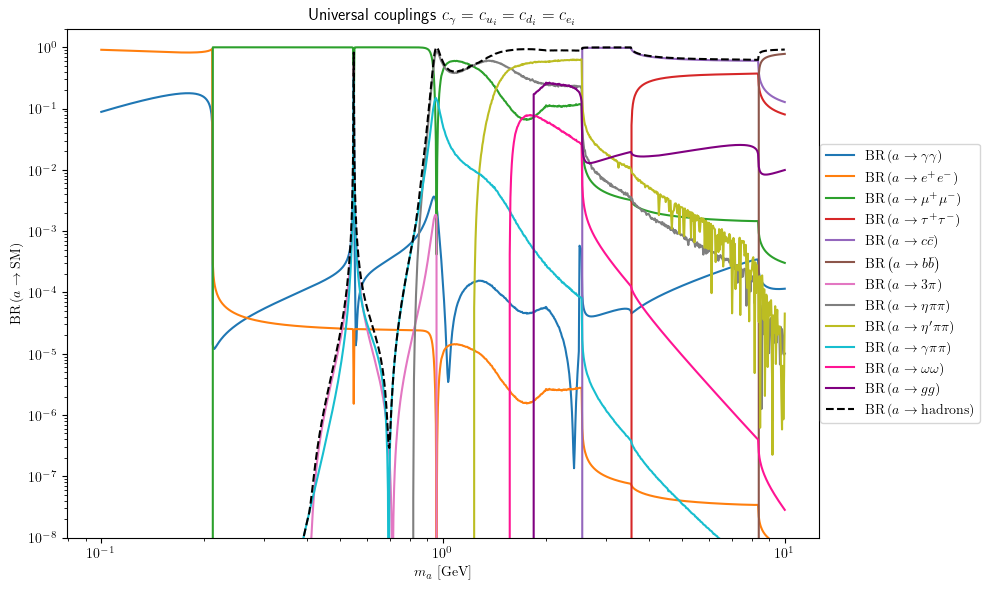

In [15]:
fig, ax = plt.subplots(figsize=(10, 6)) 

ax.plot(ma, branching_ratio('a -> gamma gamma', ma, couplings, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow \gamma\gamma\right)$")
ax.plot(ma, branching_ratio('a -> e e', ma, couplings, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow e^+e^-\right)$")
ax.plot(ma, branching_ratio('a -> mu mu', ma, couplings, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow \mu^+\mu^-\right)$")
ax.plot(ma, branching_ratio('a -> tau tau', ma, couplings, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow \tau^+\tau^-\right)$")
ax.plot(ma, branching_ratio('a -> charm charm', ma, couplings, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow c\bar{c}\right)$")
ax.plot(ma, branching_ratio('a -> bottom bottom', ma, couplings, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow b\bar{b}\right)$")
ax.plot(ma, branching_ratio('a -> pion pion pion', ma, couplings, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow 3\pi\right)$")
ax.plot(ma, branching_ratio('a -> eta pion pion', ma, couplings, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow \eta\pi\pi\right)$")
ax.plot(ma, branching_ratio('a -> eta_prime pion pion', ma, couplings, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow \eta'\pi\pi\right)$")
ax.plot(ma, branching_ratio('a -> gamma pion pion', ma, couplings, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow \gamma\pi\pi\right)$")
ax.plot(ma, branching_ratio('a -> omega omega', ma, couplings, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow \omega\omega\right)$", c='deeppink')
ax.plot(ma, branching_ratio('a -> gluon gluon', ma, couplings, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow gg\right)$", c='purple')
ax.plot(ma, branching_ratio('a -> hadrons', ma, couplings, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow \mathrm{hadrons}\right)$", c='k', ls='--')


ax.set_ylim(1e-8,2)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$m_a \, \left[\textrm{GeV}\right]$")
ax.set_ylabel(r"$\textrm{BR} \left(a\to \textrm{SM}\right)$")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.1)

plt.title(r'Universal couplings $c_\gamma = c_{u_i} = c_{d_i} = c_{e_i}$')
plt.tight_layout()  # Adjust the layout to make room for the legend

In [13]:
import alpaca

c = alpaca.uvmodels.QED_DFSZ.get_couplings({alpaca.uvmodels.beta: np.pi/4}, 1e3).match_run(10.1, 'VA_below')

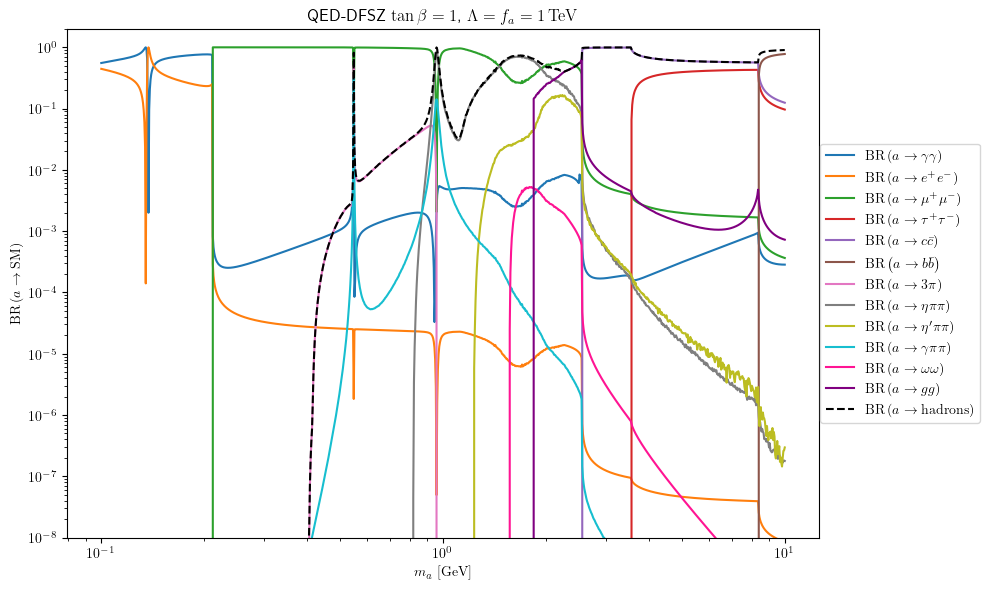

In [14]:
fig, ax = plt.subplots(figsize=(10, 6)) 

ax.plot(ma, branching_ratio('a -> gamma gamma', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow \gamma\gamma\right)$")
ax.plot(ma, branching_ratio('a -> e e', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow e^+e^-\right)$")
ax.plot(ma, branching_ratio('a -> mu mu', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow \mu^+\mu^-\right)$")
ax.plot(ma, branching_ratio('a -> tau tau', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow \tau^+\tau^-\right)$")
ax.plot(ma, branching_ratio('a -> charm charm', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow c\bar{c}\right)$")
ax.plot(ma, branching_ratio('a -> bottom bottom', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow b\bar{b}\right)$")
ax.plot(ma, branching_ratio('a -> pion pion pion', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow 3\pi\right)$")
ax.plot(ma, branching_ratio('a -> eta pion pion', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow \eta\pi\pi\right)$")
ax.plot(ma, branching_ratio('a -> eta_prime pion pion', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow \eta'\pi\pi\right)$")
ax.plot(ma, branching_ratio('a -> gamma pion pion', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow \gamma\pi\pi\right)$")
ax.plot(ma, branching_ratio('a -> omega omega', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow \omega\omega\right)$", c='deeppink')
ax.plot(ma, branching_ratio('a -> gluon gluon', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow gg\right)$", c='purple')
ax.plot(ma, branching_ratio('a -> hadrons', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow \mathrm{hadrons}\right)$", c='k', ls='--')


ax.set_ylim(1e-8,2)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$m_a \, \left[\textrm{GeV}\right]$")
ax.set_ylabel(r"$\textrm{BR} \left(a\to \textrm{SM}\right)$")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.1)

plt.title(r'QED-DFSZ $\tan\beta=1$, $\Lambda=f_a=1\,\mathrm{TeV}$')
plt.tight_layout()  # Adjust the layout to make room for the legend

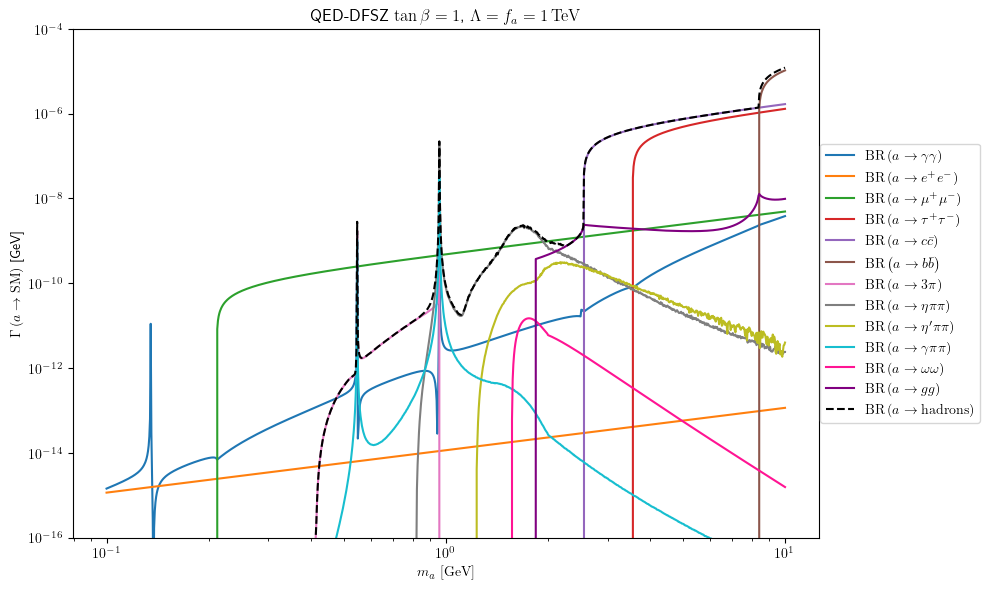

In [20]:
fig, ax = plt.subplots(figsize=(10, 6)) 

ax.plot(ma, decay_width('a -> gamma gamma', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow \gamma\gamma\right)$")
ax.plot(ma, decay_width('a -> e e', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow e^+e^-\right)$")
ax.plot(ma, decay_width('a -> mu mu', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow \mu^+\mu^-\right)$")
ax.plot(ma, decay_width('a -> tau tau', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow \tau^+\tau^-\right)$")
ax.plot(ma, decay_width('a -> charm charm', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow c\bar{c}\right)$")
ax.plot(ma, decay_width('a -> bottom bottom', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow b\bar{b}\right)$")
ax.plot(ma, decay_width('a -> pion pion pion', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow 3\pi\right)$")
ax.plot(ma, decay_width('a -> eta pion pion', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow \eta\pi\pi\right)$")
ax.plot(ma, decay_width('a -> eta_prime pion pion', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow \eta'\pi\pi\right)$")
ax.plot(ma, decay_width('a -> gamma pion pion', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow \gamma\pi\pi\right)$")
ax.plot(ma, decay_width('a -> omega omega', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow \omega\omega\right)$", c='deeppink')
ax.plot(ma, decay_width('a -> gluon gluon', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow gg\right)$", c='purple')
ax.plot(ma, decay_width('a -> hadrons', ma, c, fa, integrator='no_rge'), label=r"$\textrm{BR}\left(a\rightarrow \mathrm{hadrons}\right)$", c='k', ls='--')


ax.set_ylim(1e-16,1e-4)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$m_a \, \left[\textrm{GeV}\right]$")
ax.set_ylabel(r"$\Gamma \left(a\to \textrm{SM}\right)$ [GeV]")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.1)

plt.title(r'QED-DFSZ $\tan\beta=1$, $\Lambda=f_a=1\,\mathrm{TeV}$')
plt.tight_layout()  # Adjust the layout to make room for the legend